# 16 Fourier Transforms
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Brunton, Chapter 1, Section 2

### Additional Resources
* [YouTube: SmarterEveryDay - What is a Fourier Series](https://www.youtube.com/watch?v=ds0cmAV-Yek)
* [YouTube: Mark Rober - This Piano Speaks English](https://www.youtube.com/watch?v=uBEL3YVzMwk)
-----

The Fourier Transform is a unitary coordinate transform useful for,
* Representing data
* Images
* Solutions for Partial Differential Equations (Fourier created it for this reason)

Temperature distribution of a sheet of metal $U(x,y,t)$.
$$U_T = \frac{\partial U}{\partial t} = \alpha \nabla^2 U$$

$\nabla^2$ is the Laplace transformation: $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$

Fourier discovered a transform that diagonalizes the Laplacian operator. The Laplacian has eigenvalues and eigenfunctions, where the eigenvalues are trig functions, such as $\cos x$ and $\sin x$. The SVD can be considered as an extension of a data-driven fast-fourier transform.

These sines and cosines serve as a basis for all functions, and any arbitrary function can be represented as a linear combination of these sines and cosines.

The __Fast-Fourier Transform (FFT)__ is the method of calculating a fourier series efficiently on a computer (processing data, such as audio, images, and video). Much of our modern digital communication is based on FFT.

## The Inner Product for functions

$$\left< f(x), g(x) \right> = \int_a^b f(x)\bar{g}(x) dx$$
where $\bar{g}(x)$ is the complex conjugate of $g(x)$. If it's not complex, then they are the same.

The inner product tells how similar two vectors are. This is the same idea - the inner product tells how similar two functions are.
* Vectors:
  * If two vectors are orthogonal, the inner product is 0
  * If two vectors are near parallel, the inner product is very large
* Functions: Very similary to vectors
  * If two functions are similar (parallel), then the inner product is very large

1. Sample the functions
  * Choose a number of discrete points ${x_0,x_1,x_2,\dots,x_n}$
    * $\Delta x = \frac{b-a}{n}$
    * For now, assume $\Delta x$ is constant
  * $f(x)$ at each $x$, so we have points $f_0,f_1, f_2, \dots, f_n$.
  * $g(x)$ at each $x$, so we have points $g_0,g_1, g_2, \dots, g_n$.
2. Define these as vectors:
$$\vec{f} = \begin{bmatrix}
f_1 \\ f_2 \\ \vdots \\ f_n
\end{bmatrix} \qquad \vec{g} = \begin{bmatrix}
g_1 \\ g_2 \\ \vdots \\ g_n
\end{bmatrix}$$
As we take $n\to\infty$, we get our integral definition of the inner product.
$$\left<\vec{f},\vec{g}\right> = \vec{g}^{~*}\vec{f} = \begin{bmatrix} \bar{g}_0 & \bar{g}_1 & \bar{g}_2 & \dots & \bar{g}_n \end{bmatrix}\begin{bmatrix}
f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_n
\end{bmatrix} = \sum_{k=1}^n f_k\bar{g}_k$$

*Issue*: If we double the number of datapoints, we will double our inner product since we have twice as many points. This shouldn't happen, so we normalize the vectors by $\Delta x$.
$$\left<\vec{f},\vec{g}\right>\Delta x=\sum_{k=0}^n f(x_k)\bar{g}(x_k)\Delta x$$
$$\left<f(x),g(x)\right>=\lim_{n\to \infty}\sum_{k=0}^n f(x_k)\bar{g}(x_k)\Delta x = \int_a^b f(x)\bar{g}(x) dx$$

Find the following for $x\in[0,\pi]$:
* $\left<\cos(x),\cos(x)\right>$
* $\left<\cos(x),-\cos(x)\right>$
* $\left<\cos(x),\sin(x)\right>$

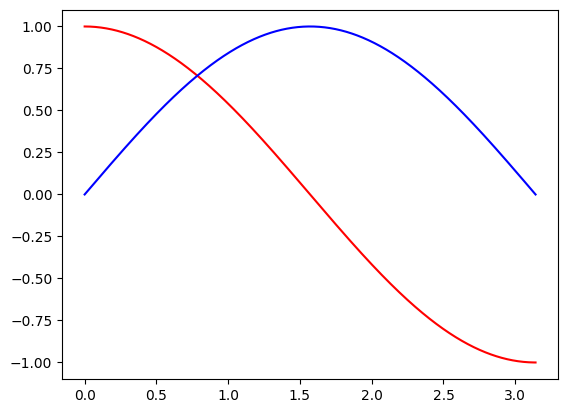

In [1]:
import numpy as np
n = 1000
a = 0
b = np.pi

dx = (b-a)/n

x = np.linspace(a,b,n)
f = np.cos(x)
g = np.sin(x)

import matplotlib.pyplot as plt
plt.plot(x,f, color='r')
plt.plot(x,g,color='b')
plt.show()

In [2]:
sum(f*f*dx)

np.float64(1.5723671231216896)

In [6]:
sum(f*(-f)*dx)

-1.5723671231216896

In [7]:
sum(f*g*dx)

5.780134713994255e-17

## Calculating the Fourier Transform

Let $f(x)$ be defined on the interval $[-\pi,\pi]$.
$$f(x) = \frac{A_0}{2} + \sum_{k=1}^\infty\left(A_k \cos(kx) + B_k \sin(kx)\right)$$

Note that the sine and cosine functions are $2\pi$-periodic.

We need to compute the coefficients $A_k$ and $B_k$. To calculate an inner product:
$$\left< f(x), g(x) \right> = \int_a^b f(x)\bar{g}(x) dx$$

where $\bar{g}(x)$ is the complex conjugate of $g(x)$. The coefficients are the inner products of $\left<f(x),\cos(kx)\right>$ and $\left<f(x),\sin(kx)\right>$.
$$A_k = \frac{1}{||\cos(kx)||^2}\left<f(x),\cos(kx)\right> = \frac{1}{\pi}\int_{-\pi}^\pi f(x)\cos(kx)dx$$
$$B_k = \frac{1}{||\sin(kx)||^2}\left<f(x),\sin(kx)\right> = \frac{1}{\pi}\int_{-\pi}^\pi f(x)\sin(kx)dx$$

To normalize these inner products, we need to take the norm of the cosine terms.

We can redefine the interval, and move it from $[-\pi,\pi]$ to $[0,L]$:
$$f(x) = \frac{A_0}{2} + \sum_{k=1}^\infty\left(A_k \cos\left(\frac{2\pi kx}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right)\right)$$
$$A_k = \frac{2}{L}\int_{0}^L f(x)\cos\left(\frac{2\pi kx}{L}\right)dx \qquad B_k = \frac{2}{L}\int_{0}^L f(x)\sin\left(\frac{2\pi kx}{L}\right)dx$$


## Creating the Fourier Basis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

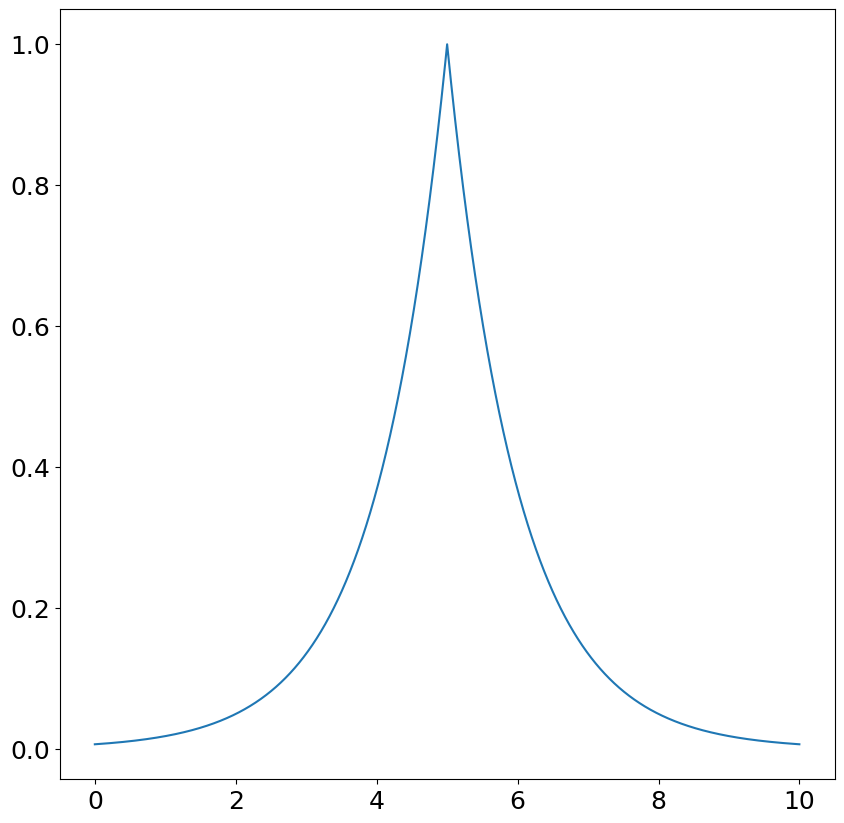

In [3]:
dx = 0.001
L = 10
x = np.arange(0,L,dx)
f = np.exp(-abs(x - L/2))

plt.rcParams['figure.figsize'] = [10,10]
plt.figure()
plt.plot(x,f)

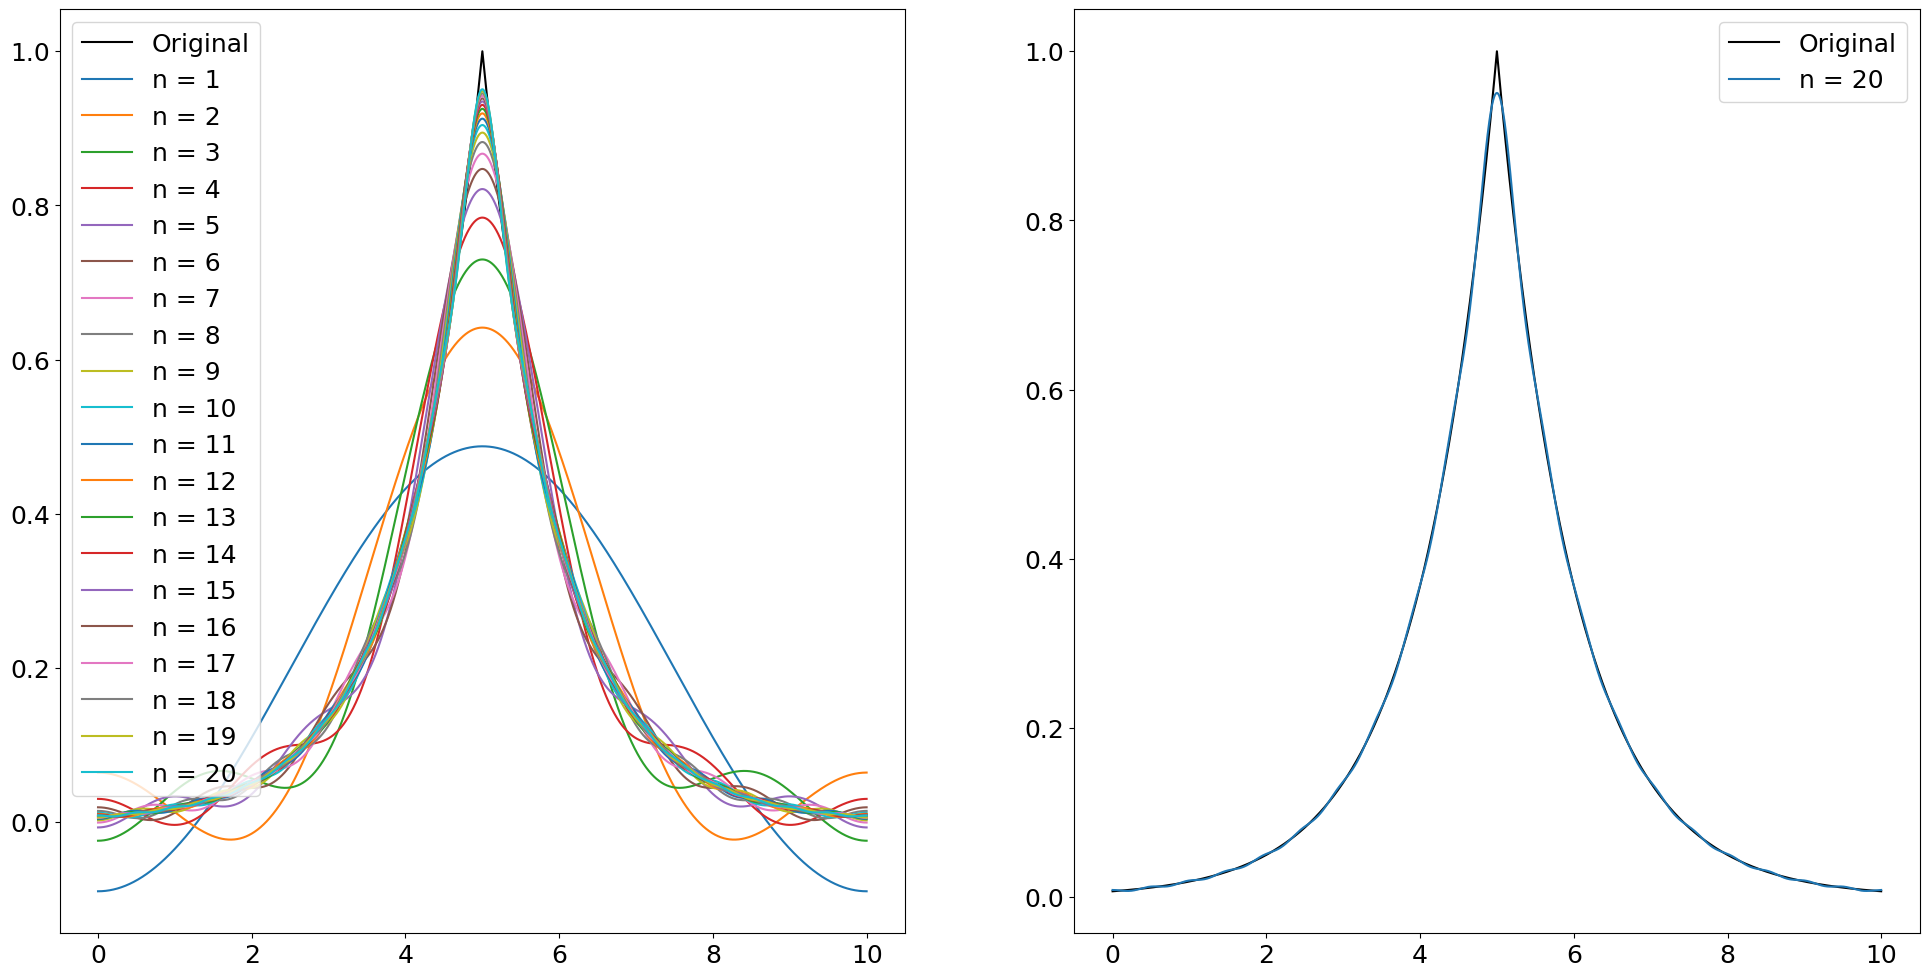

In [14]:
plt.rcParams['figure.figsize'] = [24,12]
n = 20
A = np.zeros(n+1)
B = np.zeros(n+1)

A[0] = np.sum(f * np.cos(0*x)) * dx *2/L #/ np.pi
f_fourier = A[0]/2

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(x,f, label="Original", color='k')

for k in range(1,n+1):
    A[k] = (2/L) * np.sum(f * np.cos(2*np.pi*x*k/L))*dx
    B[k] = (2/L) * np.sum(f * np.sin(2*np.pi*x*k/L))*dx
    f_fourier += A[k]*np.cos(2*np.pi*k*x/L) + B[k]*np.sin(2*np.pi*k*x/L)
    # if k % 10 == 0:
    ax1.plot(x,f_fourier, label="n = {0}".format(k))

ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(x,f, label="Original", color='k')
ax2.plot(x,f_fourier, label="n = {0}".format(k))
ax2.legend()

## Gibbs Phenomena

The "Hat" function was a continuous function. However, a "square wave" is not continuous at two points. This causes a problem right at the points of discontinuity.

As seen below, the function is approximated correctly, but there are extra waves that are still present at the point of discontinuity. If we take our Fourier Series and go to $\infty$, then they would go away. But since this is an approximation, the weird waves, known as __Gibbs Phenomenon__, starts to appear. These are just errors in the calculation because of the discontinuity.

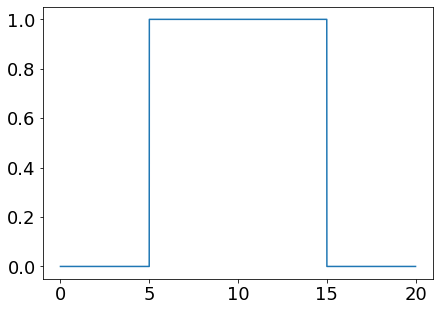

In [49]:
dx = 0.001
L = 20
x = np.arange(0,L,dx)
quarter = int(np.floor(len(x)/4))
f = np.zeros_like(x)
f[quarter:3*quarter] = 1

plt.rcParams['figure.figsize'] = [7,5]
plt.figure()
plt.plot(x,f)

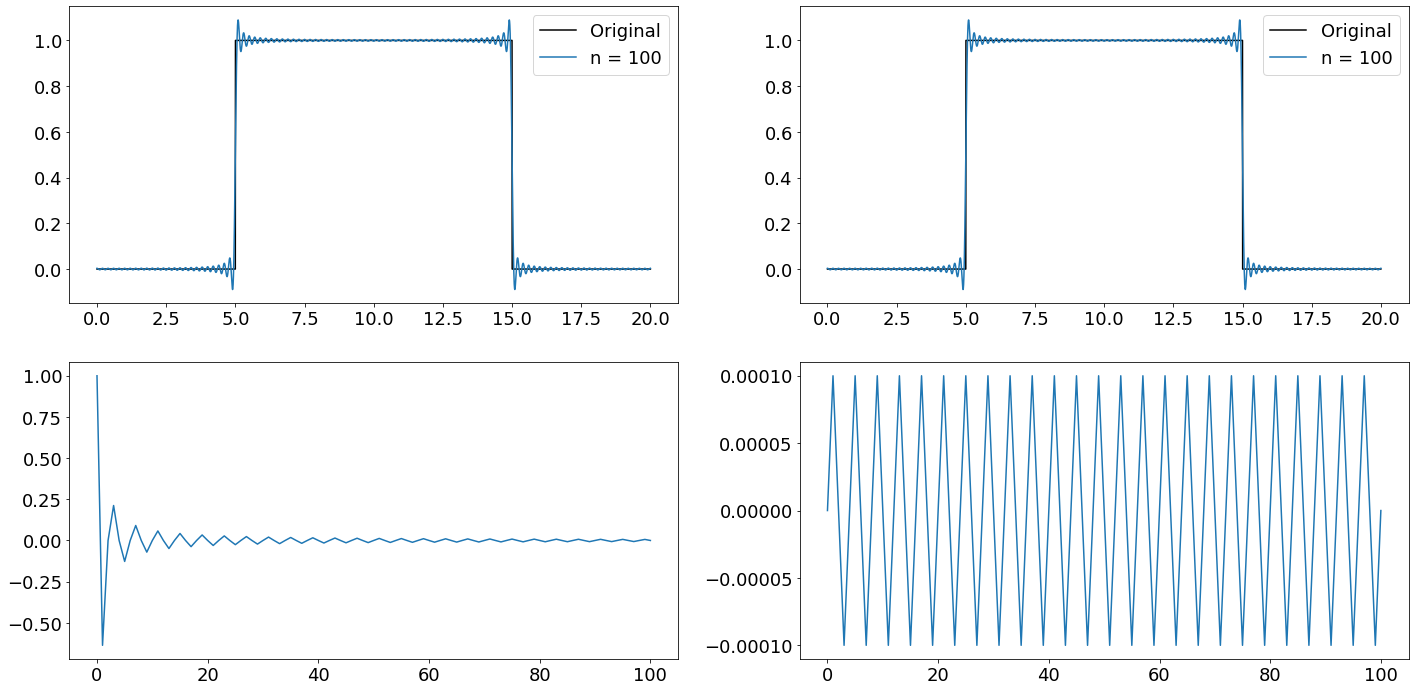

In [51]:
plt.rcParams['figure.figsize'] = [24,12]
n = 100
A = np.zeros(n+1)
B = np.zeros(n+1)

A[0] = np.sum(f * np.cos(0*x)) * dx *2/L#/ np.pi
f_fourier = A[0]/2

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x,f, label="Original", color='k')

for k in range(1,n+1):
    A[k] = np.sum(f * np.cos(2*np.pi*x*k/L))*dx *2/L#/ np.pi
    B[k] = np.sum(f * np.sin(2*np.pi*x*k/L))*dx *2/L#/ np.pi
    f_fourier += A[k]*np.cos(2*np.pi*k*x/L) + B[k]*np.sin(2*np.pi*k*x/L)
    if k % 100 == 0:
        ax1.plot(x,f_fourier, label="n = {0}".format(k))

ax1.legend()

ax2 = fig.add_subplot(222)
ax2.plot(x,f, label="Original", color='k')
ax2.plot(x,f_fourier, label="n = {0}".format(k))
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.plot(A)
ax4 = fig.add_subplot(224)
ax4.plot(B)

Look at __*CH02_SEC01_2_Gibbs_Movie.ipynb*__

## Complex Fourier Series

Recall that $e^{ix} = \cos{x} + i\sin{x}$. We can use this to write the complex Fourier Series:
$$\psi_k = e^{ik\pi x/L} \qquad f(x) = \sum_{k=-\infty}^{\infty} c_k \psi_k \qquad c_k = \frac{1}{2\pi}\left<f(x),\psi_k\right> = \frac{1}{2L}\int_{-L}^L f(x)\psi_k dx$$
which has a frequency $\omega_k = \frac{k\pi}{L}$.

## Fourier Transform (Optional for Class)

The Fourier Series approximates a function on the interval $[-L,L]$. The approximation is then $2\pi$ periodic. The Fourier Transform takes this function to $\pm\infty$. So, we can approximate any function without periodic.
$$\omega_k = \frac{k\pi}{L} = k\Delta \omega \qquad \Delta\omega = \frac{\pi}{L}$$

As $L\to \infty$, $\Delta\omega\to 0$, so our resolutions gets to be infinitessimally small.

$$f(x) = \lim_{\Delta\omega\to 0}\sum_{k=-\infty}^\infty \frac{\Delta\omega}{2\pi}\int_{-\pi/\Delta\omega}^{\pi/\Delta\omega} f(\xi)e^{-ik\Delta\omega\xi}d\xi e^{ik\Delta\omega x}$$
$$f(x) = \int_{-\infty}^\infty \frac{1}{2\pi}\int_{-\pi/\Delta\omega}^{\pi/\Delta\omega} f(\xi)e^{-i\omega\xi}d\xi e^{i\omega x}d\omega$$
$$f(x) = \int_{-\infty}^\infty \frac{1}{2\pi} \hat{f}(\omega) e^{i\omega x}d\omega$$
where $\hat{f}(\omega)$ is the fourier transform of $f(x)$.
$$\hat{f}(\omega) = \mathcal{F}\left(f(x)\right)=\int_{-\infty}^\infty f(x)e^{-i\omega x}dx \qquad f(x)=\mathcal{F}^{-1}(\hat{f}(\omega) = \frac{1}{2\pi}\int_{-\infty}^\infty \hat{f}(\omega)e^{i\omega x}d\omega$$

By transforming $f(x)$ to $\hat{f}(\omega)$, we are changing to a continuous basis of frequencies. That is, we can use any frequency, not just multiples of $\pi/L$. We can work in either space: $x$ or $\omega$.
* It is easy to calculate derivatives in the Fourier Transform domain
  * This makes it easier to do differential equations
* $\mathcal{F}$ is a Unitary operator 

$$\mathcal{F}\left(\frac{d}{dx}f(x)\right) = \int_{-\infty}^\infty \frac{df}{dx}e^{-i\omega x}dx$$
Let $dv=\frac{df}{dx}dx$, so $v=f(x)$. Likewise, let $u = e^{-i\omega x}$, so $du = -i\omega e^{-i\omega x}dx$. Then,
$$\mathcal{F}\left(\frac{d}{dx}f(x)\right) = \left.uv\right|_{-\infty}^\infty - \int_{-\infty}^\infty v~du$$
$$= \left[f(x)e^{-i\omega x}\right]_{-\infty}^\infty - \int_{-\infty}^\infty f(x)\left(-i\omega e^{-i\omega x}\right)dx$$
$$= 0 + i\omega\int_{-\infty}^\infty f(x)e^{-i\omega x}dx = i\omega \mathcal{F}\left(f(x)\right)$$
$$\mathcal{F}\left(\frac{df}{dx}\right) = i\omega \mathcal{F}\left(f(x)\right)$$

This is very useful when it comes to Partial Differential Equations for the function $U(x,t)$. Consider the following PDE. When we use the Fourier Transform, this PDE becomes an ODE.
$$U_{tt}=cU_{xx} \qquad \to \qquad \hat{U}_{tt} - \omega^2 \hat{U}$$

The function is transformed from a function of $x$ and $t$ to a function of $\omega$ and $t$.
$$U(x,t) \qquad\to\qquad \hat{U}(\omega,t)$$

## Discrete Fourier Transform

When we plot data, we never have enough data to make this a continuous function. So, we treat this discretely. To do this, we look at a series of points $[x_0,x_1,x_2,\dots,x_n]$ and the values of that function $[f_0,f_1,f_2,\dots,f_n]$.
$$x = \begin{bmatrix}x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix} \qquad 
f = \begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_n\end{bmatrix}$$

The goal of DFTs is to find a Fourier Transform vector of components of each component of $f$:
$$\hat{f} = \begin{bmatrix}\hat{f}_0 \\ \hat{f}_1 \\ \hat{f}_2 \\ \vdots \\ \hat{f}_n\end{bmatrix}$$

The coefficients are:
$$\hat{f}_k = \sum_{j=0}^{n-1}f_j e^{-i2\pi jk/n}$$

The coefficients capture both amplitude and phase shifts. To reconstruct the original data:
$$f_k = \frac{1}{n}\sum_{j=0}^{n-1} \hat{f}_j e^{i2\pi jk/n}$$

These two equations denote the DFT.

Note that each coefficient $\hat{f}_k$ is a multiple of $\omega_n = e^{-2\pi i/n}$. We'll use the frequency $\omega_n$ to create a matrix to transform $f_k$ so we don't have to compute the entire sum (that would be too much for the computer with big data). Instead, we'll create a matrix $F_n$ in terms of $\omega_n$ such that,
$$\hat{f} = F_n f$$

* The first row of $F_n$ would be the values of the 0th frequency. So every value would be $1$. 
* The second row would be the values of the 1st frequency. Take $e^{-i2\pi jk/n}$ for $k=1$.
  * Remember: $\omega_n = e^{-2\pi i/n}$
* For the third row, $k=2$.
* The nth row would be,

$$\begin{align*}
\hat{f} &= F_n f \\
\begin{bmatrix}\hat{f}_0 \\ \hat{f}_1 \\ \hat{f}_2 \\ \vdots \\ \hat{f}_n\end{bmatrix} &= \begin{bmatrix}
1 & 1 & 1 & 1 & \dots & 1 \\
1 & \omega_n & \omega_n^2 & \omega_n^3 & \dots & \omega_n^{n-1} \\
1 & \omega_n^2 & \omega_n^4 & \omega_n^6 & \dots & \omega_n^{2(n-1)} \\
\vdots & \vdots & \vdots & \vdots & \dots & \vdots \\
1 & \omega_n^{n-1} & \omega_n^{2(n-1)} & \omega_n^{3(n-1)} & \dots & \omega_n^{(n-1)^2}
\end{bmatrix}\begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_n\end{bmatrix}\end{align*}$$

Unfortunately, $F_n$ is too costly to compute. The quicker and easier way is the Fast Fourier Transform.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
i = complex(0,1)
plt.rcParams['figure.figsize'] = [12,12]

Properties of the DFT
* Vanderman Matrix
* Unitary Matrix (the inner product is the same when transformed)

In [ ]:
n = 1024
w = np.exp(-i*2*np.pi/n)

# Slow Method
# for i in range(n):
#     for j in range(n):
#         DFT(i,j) = w^((i-1)*(j-1))

# Faster Method
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)

plt.imshow(DFT)
plt.show()

## Fast Fourier Transform

__Why not use the DFT?__ Since $Af$ is a multiplication of an $n\times n$ matrix with a vector of size $n$, there are a total of $n^2$ calculations.
* DFT: $\mathcal{O}(n^2)$
* FFT: $\mathcal{O}(n \log n)$

Imagine you are recording an audio signal at 44 kHz (44,000 datapoints per second) for 10 seconds. That is a total of $n=4.4*10^5$ points. How many calculations is this?

In [ ]:
n_DFT = 440000**2
n_FFT = 440000 * np.log(440000)
print("DFT: {0:.1e} calculations    FFT: {1:.1e} calculations".format(n_DFT,n_FFT))

__Where do we use the FFT?__
* Derivatives (Solve PDEs)
* Denoise data
* Data Analysis
* Image and Audio compression
* Satellite communication

The FFT is one of the most important algorithms developed, and has been at the heart of computations for decades.

__The Algorithm__
Let's take the case where $n=2^{10}=1024$.
$$\hat{f} = F_{1024} f = 
\begin{bmatrix}
  \mathbb{I_{512}} & -D_{512} \\
  \mathbb{I_{512}} & -D_{512}
\end{bmatrix}\begin{bmatrix}
  F_{512} & 0 \\
  0 & F_{512}
\end{bmatrix}\begin{bmatrix}
  f_{even} \\ f_{odd}
\end{bmatrix}$$
$$D_{512} = \begin{bmatrix}
  1 & 0 & 0 & \dots & 0 \\
  0 & \omega & 0 & \dots & 0 \\
  0 & 0 & \omega^2 & \dots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & \dots & \omega^{511}
\end{bmatrix} \qquad \begin{bmatrix} f_{even} \\ f_{odd}\end{bmatrix} = 
\begin{bmatrix}
  f_0 \\ f_2 \\ f_4 \\ \vdots \\ f_n \\ f_1 \\ f_3 \\ \vdots \\ f_{n-1}
\end{bmatrix}$$

This cuts the computations almost in half. However, we can go futher and cut it in half again by splitting the even/odd indices of $f$ again.
$$f = \begin{bmatrix} f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_n\end{bmatrix} \to \begin{bmatrix}
  f_0 \\ f_2 \\ f_4 \\ \vdots \\ f_n \\ f_1 \\ f_3 \\ \vdots \\ f_{n-1}
\end{bmatrix} \to \begin{bmatrix}
  f_0 \\ f_4 \\ f_8 \\ \dots \\ f_2 \\ f_6 \\ f_{10} \\ \dots \\ f_1 \\ f_5 \\ f_9 \\ \dots \\ f_3 \\ f_7 \\ \dots
\end{bmatrix}$$

Doing this, we only need an $F_{256}$ matrix. Then if we do it again, ...
$$F_{1024} \to F_{512} \to F_{256} \to \dots \to F_8 \to F_4 \to F_2$$
The number of computations keeps going down. The cost of breaking it down to an $F_2$ matrix is actually still far less than the cost of the DFT.

__*CH02_SEC02_2_Denoise*__

## Gabor Transform and the Spectrogram

If we look at our audio signal as a function of time, we have precision information about where we are in time, but we don't know what frequencies are playing.

If we look at the Fourier transform, we know what frequencies are played, but we don't know where they occurred in time.

The __Gabor Transform__ connects these two so we know both. The __Spectrogram__ is what is used to display this.
* Take a Gaussian Window, a fixed-width window, over the data
* Slide this window across the spectrum over time.
* Graph the frequencies in the window as a function of time.

The Gabor Transform is built on the FFT.
$$G(f)=\hat{f}_g(t,\omega) = \int_{-\infty}^\infty f(\tau)e^{-i\omega\tau} g(t-\tau)d\tau$$

Often used for audio, but can be used for data as well:
* Classify Sounds
  * Frequencies of a car's engine
  * Instruments being played
* Identification (apps that identifies a particular song)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

In [ ]:
dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 400
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))

## Power Spectrum
n = len(t)
fhat = np.fft.fft(x,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

## Plots
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(freq[L],PSD[L],color='k',linewidth=2)
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

plt.sca(axs[1])
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()